In [1]:
import os
import sys
root_path = os.path.abspath("..")
em_simulator_path = root_path
print(em_simulator_path)
sys.path.append(em_simulator_path)

import em_simulation as sim

/Users/songjaesung/Desktop/QDLAB/githubs/EM_simulation_open/dataset-based-eme
failed to load lumerical api (Dataset acquisition) (Lumerical Version)
failed to load lumerical api (Dataset acquisition)(Ansys version)
failed to load lumerical api (Dataset acquisition) (Lumerical Version)
failed to load lumerical api (Dataset acquisition) (Ansys version)


2025-07-09 15:29:08,919	INFO worker.py:1786 -- Started a local Ray instance.
2025-07-09 15:29:08,964	INFO packaging.py:531 -- Creating a file package for local directory '/Users/songjaesung/Desktop/QDLAB/githubs/EM_simulation_open/dataset-based-eme'.
2025-07-09 15:29:08,976	INFO packaging.py:359 -- Pushing file package 'gcs://_ray_pkg_9d8e67d64cc4a7a3.zip' (0.30MiB) to Ray cluster...
2025-07-09 15:29:08,978	INFO packaging.py:372 -- Successfully pushed file package 'gcs://_ray_pkg_9d8e67d64cc4a7a3.zip'.


In [2]:
# the dataset folder path
dataset_folder = "../sample_datasets/Si_rectangular_single_waveguide"
Si_dataset = sim.DataUpdater(dataset_folder, is_testmode=True)

In [3]:
top_width = 1e-6
input_angle = 0
parameters = {
    "top_width_input" : 2e-6,
    "top_width_output" : 2e-6,
    "input_angle_deg" : 0,
    "bend_angle_deg" : 90,
    "effective_radius": 20e-6,
    "p" : 0.5,
    "resolution" : 1000,
    "limit_mode_number" : 0
}
partial_euler_bend = sim.SingleLinearTaperEulerBend(Si_dataset, **parameters)

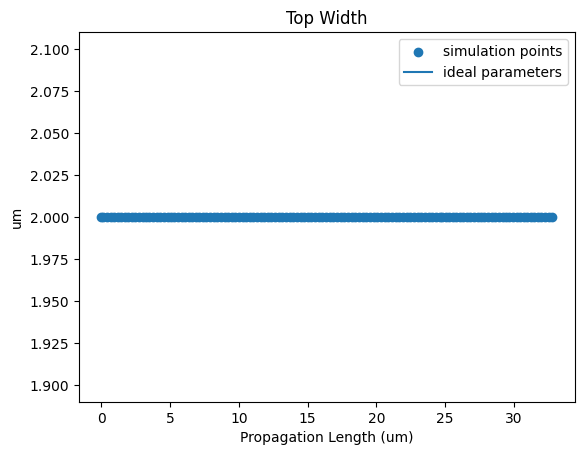

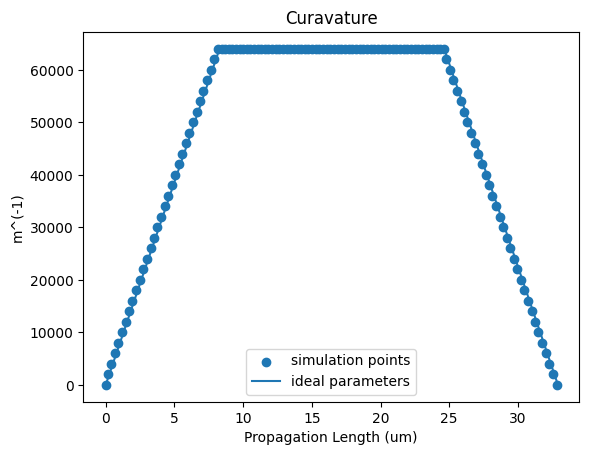

{'prop_lengths': array([0.00000000e+00, 6.57646247e-08, 1.31529249e-07, 1.97293874e-07,
        2.63058499e-07, 3.28823124e-07, 3.94587748e-07, 4.60352373e-07,
        5.26116998e-07, 5.91881622e-07, 6.57646247e-07, 7.23410872e-07,
        7.89175497e-07, 8.54940121e-07, 9.20704746e-07, 9.86469371e-07,
        1.05223400e-06, 1.11799862e-06, 1.18376324e-06, 1.24952787e-06,
        1.31529249e-06, 1.38105712e-06, 1.44682174e-06, 1.51258637e-06,
        1.57835099e-06, 1.64411562e-06, 1.70988024e-06, 1.77564487e-06,
        1.84140949e-06, 1.90717412e-06, 1.97293874e-06, 2.03870337e-06,
        2.10446799e-06, 2.17023262e-06, 2.23599724e-06, 2.30176187e-06,
        2.36752649e-06, 2.43329111e-06, 2.49905574e-06, 2.56482036e-06,
        2.63058499e-06, 2.69634961e-06, 2.76211424e-06, 2.82787886e-06,
        2.89364349e-06, 2.95940811e-06, 3.02517274e-06, 3.09093736e-06,
        3.15670199e-06, 3.22246661e-06, 3.28823124e-06, 3.35399586e-06,
        3.41976049e-06, 3.48552511e-06, 3.551289

In [19]:
partial_euler_bend.plot_structure_parameters()

100%|██████████| 33/33 [00:00<00:00, 115825.97it/s]


/opt/homebrew/anaconda3/envs/env311/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/homebrew/anaconda3/envs/env311/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


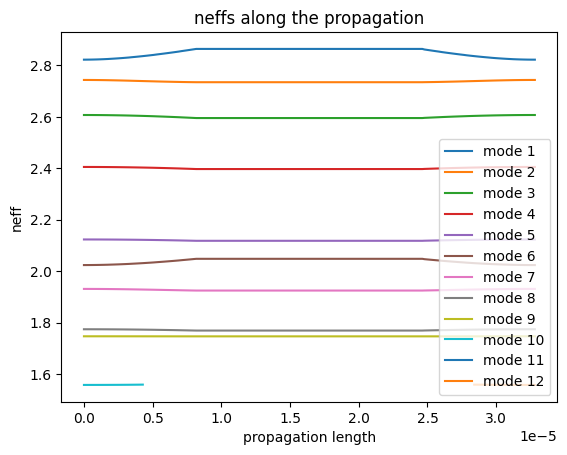

In [20]:
partial_euler_bend.plot_neffs()

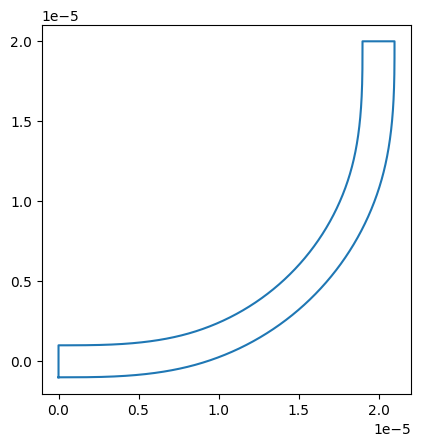

(array([ 2.09859018e-12,  3.29546369e-08,  6.59155695e-08, ...,
         3.29420453e-08, -2.09859018e-12,  2.09859018e-12], shape=(2001,)),
 array([-1.00000000e-06, -9.99999931e-07, -9.99999585e-07, ...,
         1.00000007e-06,  1.00000000e-06, -1.00000000e-06], shape=(2001,)))

In [21]:
partial_euler_bend.plot_2D_structure()

In [22]:
partial_euler_bend_eme = sim.EME(partial_euler_bend)

In [23]:
partial_euler_bend_runner = sim.Runner(partial_euler_bend_eme)

In [26]:
partial_euler_bend_runner.propagate([1,0,0,0,0,0,0,0,0,0])

array([[ 1.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00+0.0000000e+00j, ...,
         0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00+0.0000000e+00j],
       [ 6.3043542e-02+9.9801075e-01j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00+0.0000000e+00j, ...,
         0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00+0.0000000e+00j],
       [ 6.3022658e-02+9.9768013e-01j,  1.6226467e-03+2.5687300e-02j,
         8.4503872e-06+1.3378855e-04j, ...,
         8.1363920e-05-8.4035935e-05j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00+0.0000000e+00j],
       ...,
       [ 7.9628384e-01-5.9005177e-01j, -1.2164668e-01+4.3632008e-02j,
         2.4281090e-02-1.3316966e-02j, ...,
         8.1003302e-05-1.1838546e-04j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00+0.0000000e+00j],
       [-7.1574283e-01+6.8552268e-01j,  1.0984573e-01-6.8085104e-02j,
        -1.8116185e-02

{'prop_lengths': array([ 0.        ,  0.13179336,  0.39538009,  0.65896682,  0.92255355,
         1.18614028,  1.44972701,  1.71331374,  1.94395212,  2.20753885,
         2.47112558,  2.73471231,  2.99829904,  3.26188577,  3.49252416,
         3.75611089,  4.01969761,  4.28328434,  4.54687107,  4.8104578 ,
         5.07404453,  5.30468292,  5.56826965,  5.83185637,  6.0954431 ,
         6.35902983,  6.62261656,  6.88620329,  7.11684168,  7.38042841,
         7.64401513,  7.90760186,  8.17118859,  8.43243529,  8.69391204,
         8.9556004 ,  9.21748768,  9.47956459,  9.74182389, 10.00425962,
        10.26686665, 10.52964037, 10.79257661, 11.05567144, 11.31892122,
        11.58232248, 11.84587192, 12.10956639, 12.3734029 , 12.63737857,
        12.90149063, 13.16573644, 13.43011344, 13.69461919, 13.95925132,
        14.22400757, 14.48888573, 14.7538837 , 15.01899943, 15.28423095,
        15.54957635, 15.81503379, 16.08060148, 16.34627769, 16.61206074,
        16.87794902, 17.14394096, 1

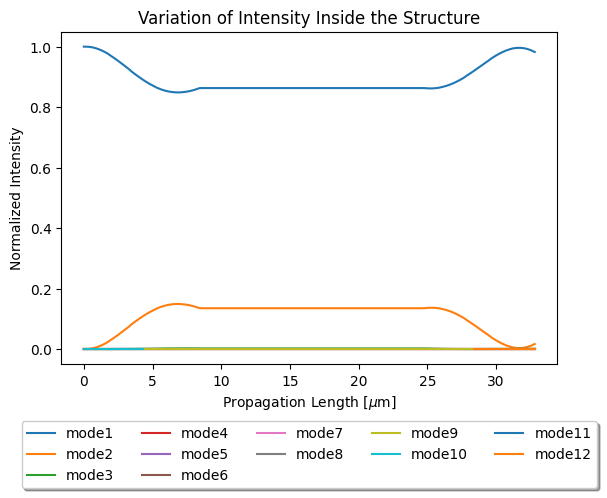

In [27]:
partial_euler_bend_runner.plot_intensity_along_propagation()

In [28]:
partial_euler_bend_runner.propagate([0,1,0,0,0,0,0,0,0,0])

array([[ 0.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  1.05037600e-01+9.94468272e-01j,
         0.00000000e+00+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [-2.70351162e-03-2.55961400e-02j,  1.04990155e-01+9.94019091e-01j,
         1.63109868e-03+1.54428491e-02j, ...,
         7.36589345e-06-8.28036900e-06j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       ...,
       [-1.10739082e-01+6.71707988e-02j, -9.50483501e-01+2.01218024e-01j,
         2.97145080e-02-1.96677759e-01j, ...,
        -1.66358644e-04+1.07694628e-04j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 1.01410821e-01-8.05661604e-02j,  8.

{'prop_lengths': array([ 0.        ,  0.13179336,  0.39538009,  0.65896682,  0.92255355,
         1.18614028,  1.44972701,  1.71331374,  1.94395212,  2.20753885,
         2.47112558,  2.73471231,  2.99829904,  3.26188577,  3.49252416,
         3.75611089,  4.01969761,  4.28328434,  4.54687107,  4.8104578 ,
         5.07404453,  5.30468292,  5.56826965,  5.83185637,  6.0954431 ,
         6.35902983,  6.62261656,  6.88620329,  7.11684168,  7.38042841,
         7.64401513,  7.90760186,  8.17118859,  8.43243529,  8.69391204,
         8.9556004 ,  9.21748768,  9.47956459,  9.74182389, 10.00425962,
        10.26686665, 10.52964037, 10.79257661, 11.05567144, 11.31892122,
        11.58232248, 11.84587192, 12.10956639, 12.3734029 , 12.63737857,
        12.90149063, 13.16573644, 13.43011344, 13.69461919, 13.95925132,
        14.22400757, 14.48888573, 14.7538837 , 15.01899943, 15.28423095,
        15.54957635, 15.81503379, 16.08060148, 16.34627769, 16.61206074,
        16.87794902, 17.14394096, 1

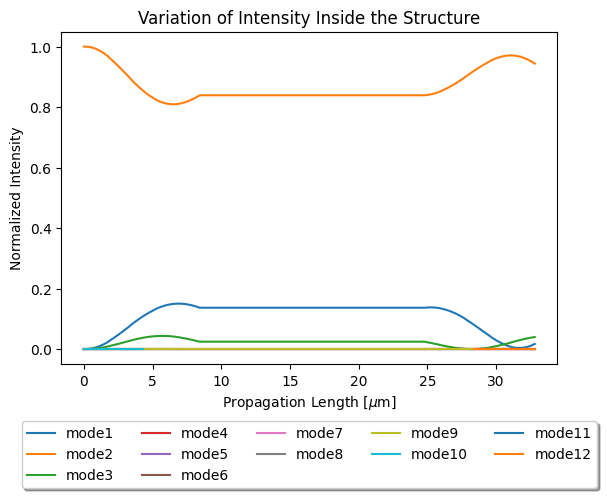

In [29]:
partial_euler_bend_runner.plot_intensity_along_propagation()